# Marie Tabourin 02005176
# Xinyue Jiang 11913955

In [2]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

# I. Apprentissage supervisé: Feature engineering et Classification

## 1. Chargement des données et préparation

In [4]:
data = pd.read_csv('./credit_scoring.csv', sep=';')
data.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [5]:
nom_cols = data.columns
df=pd.DataFrame(data)
#separate status from whole dataframe
y=np.array(df["Status"]).reshape(-1,1)
#drop off the column status and transfert it to array for analysis
df_sep=df.drop(columns=["Status"])
X=np.array(df_sep)

(4375, 1)


(array([1216.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3159.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

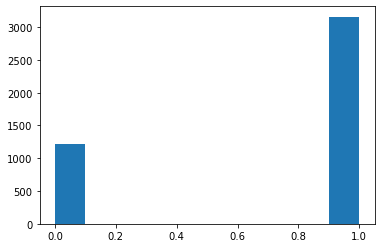

In [4]:
#discover our array data
print(np.shape(y))
#nombre d'exemples positifs et négatifs
plt.hist(y)
# Il y a environ 1250 négatifs (0) et 3250 positifs (1)

In [5]:
#separate with the prof's suggestion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=1)

##  2. Apprentissage et évaluation de modèles 

In [6]:
#CART : classification and regression trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score
tree=DecisionTreeClassifier(random_state=1)
digit_tree=tree.fit(X_train, y_train)
y_pred = digit_tree.predict(X_test)
# Estimation de l'accuracy
print("accuracy score:",accuracy_score(y_test, y_pred))
# Estimation de la precision
print("précision:", precision_score(y_test, y_pred))

accuracy score: 0.7193784277879341
précision: 0.8193548387096774


In [7]:
#k-plus-proches-voisins avec k=5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
digit_knn=knn.fit(X_train, y_train)
y_pred_knn = digit_knn.predict(X_test)
# Estimation de l'accuracy
print("accuracy score:",accuracy_score(y_test, y_pred_knn))
# Estimation de la precision
print("précision:", precision_score(y_test, y_pred_knn))

accuracy score: 0.7330895795246801
précision: 0.7783842794759825


In [8]:
#MultilayerPerceptron
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(40,20), random_state=1)
digit_clf=clf.fit(X_train, y_train)
y_pred_clf = digit_clf.predict(X_test)
# Estimation de l'accuracy
print("accuracy score:",accuracy_score(y_test, y_pred_clf))
# Estimation de la precision
print("précision:", precision_score(y_test, y_pred_clf))

accuracy score: 0.45978062157221206
précision: 0.8808664259927798


#### Pour la comparaison, nous avons calculer l'accuracy et la Précision. Nous avons choisi la précision car dans ce cas il est plus interessant d'avoir tous les positifs pour avoir toutes les personnes qui doivent rembourser leur crédit. La meilleure estimation semble être avec la méthode k-plus-proches-voisins car l'accuracy est la plus élevée et la précision est aussi assez élevée.  

## 3. Normalisation des variables continues

#### 1) With StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [10]:
#CART : classification and regression trees
digit_tree_norm=tree.fit(X_train_norm, y_train)
y_pred_norm = digit_tree_norm.predict(X_test_norm)
# Estimation de l'accuracy
print("accuracy score:",accuracy_score(y_test, y_pred_norm))
# Estimation de la precision
print("précision:", precision_score(y_test, y_pred_norm))

accuracy score: 0.720292504570384
précision: 0.8212435233160622


In [11]:
#k-plus-proches-voisins avec k=5
digit_knn_norm=knn.fit(X_train_norm, y_train)
y_pred_knn_norm = digit_knn_norm.predict(X_test_norm)
# Estimation de l'accuracy
print("accuracy score:",accuracy_score(y_test, y_pred_knn_norm))
# Estimation de la precision
print("précision:", precision_score(y_test, y_pred_knn_norm))

accuracy score: 0.7742230347349177
précision: 0.8230500582072177


In [12]:
#MultilayerPerceptron
digit_clf_norm=clf.fit(X_train_norm, y_train)
y_pred_clf_norm = digit_clf_norm.predict(X_test_norm)
# Estimation de l'accuracy
print("accuracy score:",accuracy_score(y_test, y_pred_clf_norm))
# Estimation de la precision
print("précision:", precision_score(y_test, y_pred_clf_norm))

accuracy score: 0.7751371115173674
précision: 0.8357487922705314


####  La normalisation permet d'augmenter les scores d'accuracy et de précision pour MultilayerPerceptron et K-plus proches voisins mais pas pour CART. MultilayerPerceptron est ici la meilleurs estimations après la normalisation des données 

#### 2) with MinMaxScaler

In [13]:
from sklearn.preprocessing import MinMaxScaler
MinMaxscaler = MinMaxScaler()
MinMaxscaler.fit(X_train)
X_train_MM = MinMaxscaler.transform(X_train)
X_test_MM = MinMaxscaler.transform(X_test)

In [14]:
#CART : classification and regression trees
digit_tree_MM=tree.fit(X_train_MM, y_train)
y_pred_MM = digit_tree_MM.predict(X_test_MM)
# Estimation de l'accuracy
print("accuracy score:",accuracy_score(y_test, y_pred_MM))
# Estimation de la precision
print("précision:", precision_score(y_test, y_pred_MM))

accuracy score: 0.720292504570384
précision: 0.8187660668380463


In [15]:
#k-plus-proches-voisins avec k=5
digit_knn_MM=knn.fit(X_train_MM, y_train)
y_pred_knn_MM = digit_knn_MM.predict(X_test_MM)
# Estimation de l'accuracy
print("accuracy score:",accuracy_score(y_test, y_pred_knn_MM))
# Estimation de la precision
print("précision:", precision_score(y_test, y_pred_knn_MM))

accuracy score: 0.746800731261426
précision: 0.8158844765342961


In [16]:
#MultilayerPerceptron
digit_clf_MM=clf.fit(X_train_MM, y_train)
y_pred_clf_MM = digit_clf_MM.predict(X_test_MM)
# Estimation de l'accuracy
print("accuracy score:",accuracy_score(y_test, y_pred_clf_MM))
# Estimation de la precision
print("précision:", precision_score(y_test, y_pred_clf_MM))

accuracy score: 0.7851919561243145
précision: 0.8262370540851554


#### Avec MinMaxScaler, c'est toujours MultilayerPerceptron qui a la meilleure estimation.

### 4. Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales

In [17]:
#PCA without normalization
from sklearn.decomposition import PCA
# définition de la commande
pca = PCA(n_components=3)
pca.fit(X_train_norm)
# Estimation, calcul des composantes principales
C = pca.transform(X_train_norm)
D = pca.transform(X_test_norm)
# Décroissance de la variance expliquée
print(pca.explained_variance_ratio_)
# Peu d'information est gardée avec les 3 premières dimenssions (44%)

# Concaténation des 3 dimensions avec les données normaisées
X_comb_train = np.concatenate((X_train_norm, C), axis=1)
X_comb_test = np.concatenate((X_test_norm, D), axis=1)

[0.19114316 0.14583152 0.10609432]


In [18]:
#CART : classification and regression trees
digit_tree_combined=tree.fit(X_comb_train, y_train)
y_pred_tree_combined = digit_tree_combined.predict(X_comb_test)
# Estimation de l'accuracy
print("accuracy score:",accuracy_score(y_test, y_pred_tree_combined))
# Estimation de la precision
print("précision:", precision_score(y_test, y_pred_tree_combined))

accuracy score: 0.7294332723948812
précision: 0.8251928020565553


In [19]:
#k-plus-proches-voisins avec k=5
digit_knn_combined=knn.fit(X_comb_train, y_train)
y_pred_knn_combined = digit_knn_combined.predict(X_comb_test)
# Estimation de l'accuracy
print("accuracy score:",accuracy_score(y_test, y_pred_knn_combined))
# Estimation de la precision
print("précision:", precision_score(y_test, y_pred_knn_combined))

accuracy score: 0.7669104204753199
précision: 0.8132875143184422


In [20]:
#MultilayerPerceptron
digit_clf_combined=clf.fit(X_comb_train, y_train)
y_pred_clf_combined = digit_clf_combined.predict(X_comb_test)
# Estimation de l'accuracy
print("accuracy score:",accuracy_score(y_test, y_pred_clf_combined))
# Estimation de la precision
print("précision:", precision_score(y_test, y_pred_clf_combined))

accuracy score: 0.7879341864716636
précision: 0.8544776119402985


#### On observe une légère augmentation de l'accuracy et une augmentation de la précision avec l'ACP. Multilayer Perceptron ets toujours la méthode qui a la meilleure estimation.

#### Après toutes les analyses, on observe que la meilleure méthode est avec des données normalisées avec une ACP et la méthode MultilayerPerceptron. Nous allons ici utiliser la deuxième meilleur méthodes avec une normalisation avec StandardScaler et la méthode MultilayerPerceptron.

### 5. Sélection de variables

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


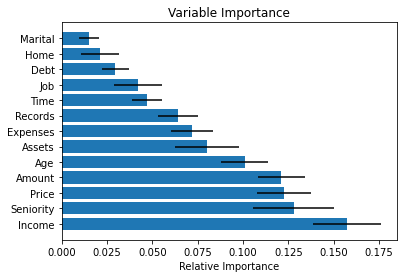

In [21]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=100) 
clf.fit(X_train_norm, y_train) 
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0) 
sorted_idx = np.argsort(importances)[::-1]
features = nom_cols 
print(features[sorted_idx])
padding = np.arange(X_train_norm.size/len(X_train_norm)) + 0.5 
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center') 
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

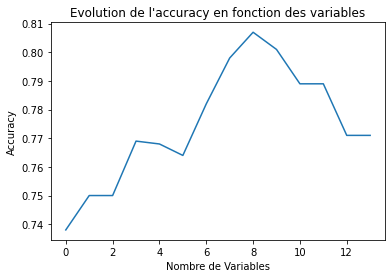

In [59]:
MLP = MLPClassifier(hidden_layer_sizes=(40,20), random_state=1)
scores=np.zeros(X_train_norm.shape[1]+1)
for f in np.arange(0, X_train_norm.shape[1]+1):
    X1_f = X_train_norm[:,sorted_idx[:f+1]]
    X2_f = X_test_norm[:,sorted_idx[:f+1]]
    MLP.fit(X1_f,y_train)
    YMLP=MLP.predict(X2_f)
    scores[f]=np.round(accuracy_score(y_test,YMLP),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

#### On observe que l'accuracy est la plus élevée avec 8 variables, il faut donc garder les 8 variables avec le plus d'importances.

### 6. Paramètrage des classifieurs

In [ ]:
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier(hidden_layer_sizes=(40,20), random_state=1)

parameters = {
    'activation': ['tanh', 'relu', 'identity', 'logistic'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive', 'invscaling'],
}

clf = GridSearchCV(mlp, parameters)
clf.fit(X_train_norm, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

#### Les meilleurs paramètres pour MLP dans ceux que nous avons testé (nous n'avons pas tout tester car cela prend beaucoup de temps à s'exécuter) sont: logistic pour l'activation, 0,0001 pour alpha, constant pour learning_rate et adam pour solver.

### 7. Création d'un pipeline

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.neighbors import KNeighborsClassifier
import pickle 
sc=[MinMaxScaler(),StandardScaler()]
clf=[RandomForestClassifier(n_estimators=100),MLPClassifier(hidden_layer_sizes=(40,20), random_state=1),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(random_state=1)]
dic_={}
f=open('scores.pkl','wb')
for norm in sc:
    list_r=[]
    for cla in clf:
        dic_ind={}
        pip=Pipeline([('scaler',norm),('pca', PCA(n_components=3)),("classifier",cla)])
        res_pip=pip.fit(X_train, y_train)
        y_pred_= res_pip.predict(X_test)
        ac_sc=accuracy_score(y_test, y_pred_)
        pr_sc=precision_score(y_test, y_pred_)
        score=f" accuracy score  {ac_sc},  precision score {pr_sc}"
        a=f'the normalization {norm} and classifier {cla} '
        dic_ind[cla]=score
        list_r.append(dic_ind)
    dic_[norm]=list_r
pickle.dump(dic_,f)
#load les donnees
df=pickle.load(open('scores.pkl','rb'))
print(df)

{MinMaxScaler(): [{RandomForestClassifier(): ' accuracy score  0.7431444241316271,  precision score 0.8025551684088269'}, {MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1): ' accuracy score  0.7595978062157221,  precision score 0.8024691358024691'}, {KNeighborsClassifier(): ' accuracy score  0.7349177330895795,  precision score 0.8054892601431981'}, {DecisionTreeClassifier(random_state=1): ' accuracy score  0.696526508226691,  precision score 0.8044041450777202'}], StandardScaler(): [{RandomForestClassifier(): ' accuracy score  0.7111517367458866,  precision score 0.7652838427947598'}, {MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1): ' accuracy score  0.7349177330895795,  precision score 0.7585858585858586'}, {KNeighborsClassifier(): ' accuracy score  0.70018281535649,  precision score 0.7651006711409396'}, {DecisionTreeClassifier(random_state=1): ' accuracy score  0.6352833638025595,  precision score 0.7521902377972466'}]}


### 8. Comparaison de plusieurs algorithmes d'apprentissage

In [23]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import time

clfs = {
    'RF': RandomForestClassifier(n_estimators=50, random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'CART': DecisionTreeClassifier(random_state=1),
    'MLP' : MLPClassifier(hidden_layer_sizes=(40,20), random_state=1, activation='logistic', alpha= 0.0001, learning_rate='constant', solver='adam'),
    'BGG' : BaggingClassifier(n_estimators=50),
    'ABC' : AdaBoostClassifier(n_estimators=50)
}

def run_classifiers(clfs, X, Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i in clfs:
        clf = clfs[i]
        start = time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf)
        cv_prec = cross_val_score(clf, X, Y, cv=kf, scoring = 'precision')
        cv_auc = cross_val_score(clf, X, Y, cv=kf, scoring = 'roc_auc')
        runtimes = time.time() - start
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        print("Precision for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_prec), np.std(cv_prec)))
        print("AUC for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_auc), np.std(cv_auc)))
        print("time for {0} is:".format(i), runtimes)


run_classifiers(clfs, X_norm, y)

Accuracy for RF is: 0.783 +/- 0.014
Precision for RF is: 0.819 +/- 0.017
AUC for RF is: 0.823 +/- 0.015
time for RF is: 8.504615306854248
Accuracy for KNN is: 0.764 +/- 0.019
Precision for KNN is: 0.822 +/- 0.020
AUC for KNN is: 0.788 +/- 0.024
time for KNN is: 2.2553608417510986
Accuracy for CART is: 0.727 +/- 0.025
Precision for CART is: 0.808 +/- 0.022
AUC for CART is: 0.656 +/- 0.032
time for CART is: 0.6915466785430908
Accuracy for MLP is: 0.794 +/- 0.015
Precision for MLP is: 0.827 +/- 0.020
AUC for MLP is: 0.833 +/- 0.022
time for MLP is: 102.01809763908386
Accuracy for BGG is: 0.776 +/- 0.012
Precision for BGG is: 0.826 +/- 0.016
AUC for BGG is: 0.817 +/- 0.021
time for BGG is: 25.92080283164978
Accuracy for ABC is: 0.788 +/- 0.016
Precision for ABC is: 0.823 +/- 0.018
AUC for ABC is: 0.829 +/- 0.021
time for ABC is: 7.521658658981323


#### Danc cette comparaison de plusieurs algorithmes, MultilayerPerceptron semble être celui qui fait la meilleure estimation, par contre, il est le plus long. Il faut donc parfois faire des compromis entre le temps et la qualité des résultats. MultilayerPerceptron possède aussi l'AUC le plus élevé ce qui signifie qu'il a une meilleure répartitition entre les faux négatifs et faux positifs (plus l'AUC est proche de 1, mieux c'est).
#### L'arbre de décision (CART) semble être le moins bon, avec un écart-type plus élevé et une accuracy plus faible que les autres.

# II. Apprentissage supervisé: Données hétérogènes

## 1.a. Chargement des données et préparation

In [26]:
data2 = pd.read_csv('./TP_AS/credit.data', sep='\t', header = None)
#affiche tous les valeurs
#pd.set_option('max_colwidth',200)
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
#print(data)
data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [27]:
df2=pd.DataFrame(data2)
#separate status from whole dataframe
y2=np.array(df2[15]).reshape(-1,1)
#drop off the column status and transfert it to array for analysis
df_sep2=df2.drop(columns=[15])
X2=np.array(df_sep2)

In [40]:
#creation de sous-ensemble et replace ? par NaN et float
for column in list(df2.columns):
    df2[column] = pd.to_numeric(df2[column], downcast='integer', errors='coerce')
df_yep=df2.dropna(axis=1,how="all")
df_astype=df_yep.astype(float)
#suppression d'individu
print("avant la suppression d'individus:")
print(np.shape(df_astype))
print("après la suppression d'individus:")
np_concat=np.concatenate((df_yep,y2),axis=1)
df_sp_ind=pd.DataFrame(np_concat).dropna()
print(np.shape(df_sp_ind))
# Binarisation du target
y2_clear=np.array(df_sp_ind[6]).reshape(-1,1)
list_y2=[]
for i in y2_clear:
    if i =="+":
        list_y2.append(1)
    elif i=="-":
        list_y2.append(0)
y2_trans=np.array(list_y2).reshape(-1,1)
df_sep2_X2=df_sp_ind.drop(columns=[6])
X2_clear=np.array(df_sep2_X2)

avant la suppression d'individus:
(688, 6)
après la suppression d'individus:
(666, 7)


(666, 1)


(array([367.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 299.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

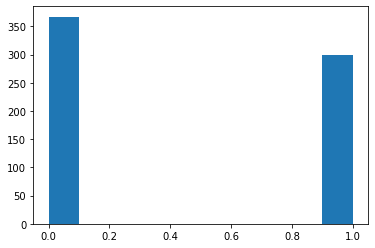

In [42]:
#discover our array data
print(np.shape(y2_trans))
#nombre d'exemples positifs et négatifs
plt.hist(y2_trans)
# Il y a environ 360 négatifs (0) et 300 positifs (1)

In [45]:
run_classifiers(clfs, X2_clear, y2_trans)

Accuracy for RF is: 0.788 +/- 0.053
Precision for RF is: 0.808 +/- 0.058
AUC for RF is: 0.841 +/- 0.046
time for RF is: 2.037921667098999
Accuracy for KNN is: 0.704 +/- 0.055
Precision for KNN is: 0.756 +/- 0.075
AUC for KNN is: 0.745 +/- 0.042
time for KNN is: 0.10400199890136719
Accuracy for CART is: 0.716 +/- 0.047
Precision for CART is: 0.680 +/- 0.045
AUC for CART is: 0.711 +/- 0.051
time for CART is: 0.08883833885192871
Accuracy for MLP is: 0.803 +/- 0.038
Precision for MLP is: 0.838 +/- 0.049
AUC for MLP is: 0.848 +/- 0.033
time for MLP is: 10.21897292137146
Accuracy for BGG is: 0.790 +/- 0.052
Precision for BGG is: 0.801 +/- 0.043
AUC for BGG is: 0.834 +/- 0.050
time for BGG is: 3.1643424034118652
Accuracy for ABC is: 0.770 +/- 0.063
Precision for ABC is: 0.761 +/- 0.060
AUC for ABC is: 0.841 +/- 0.053
time for ABC is: 2.1265053749084473


#### On observe que le meilleur algorithme semble être MultilayerPerceptron, qui possède la plus grande accuracy et précision, les écart-types les plus faibles donc plus stable et l'AUC la plus élevée donc une meilleure répartition entre les faux positifs et les faux négatifs. Par contre, il est le plus long à s'exécuter.

## 1.b Normalisation des variables continues

In [51]:
X2_train, X2_test, y2_train, y2_test=train_test_split(X2_clear,y2_trans, random_state=1)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X2_train)
X2_train_norm = scaler.transform(X2_train)
X2_test_norm = scaler.transform(X2_test)
scaler.fit(X2_clear)
X2_norm = scaler.transform(X2_clear)

In [53]:
run_classifiers(clfs, X2_norm, y2_trans)

Accuracy for RF is: 0.790 +/- 0.050
Precision for RF is: 0.809 +/- 0.058
AUC for RF is: 0.841 +/- 0.046
time for RF is: 2.131981611251831
Accuracy for KNN is: 0.737 +/- 0.056
Precision for KNN is: 0.822 +/- 0.052
AUC for KNN is: 0.818 +/- 0.046
time for KNN is: 0.09360933303833008
Accuracy for CART is: 0.716 +/- 0.048
Precision for CART is: 0.679 +/- 0.048
AUC for CART is: 0.711 +/- 0.052
time for CART is: 0.0757284164428711
Accuracy for MLP is: 0.764 +/- 0.049
Precision for MLP is: 0.814 +/- 0.064
AUC for MLP is: 0.827 +/- 0.050
time for MLP is: 9.887094259262085
Accuracy for BGG is: 0.781 +/- 0.043
Precision for BGG is: 0.795 +/- 0.047
AUC for BGG is: 0.835 +/- 0.050
time for BGG is: 2.9762744903564453
Accuracy for ABC is: 0.770 +/- 0.063
Precision for ABC is: 0.761 +/- 0.060
AUC for ABC is: 0.841 +/- 0.053
time for ABC is: 2.0198068618774414


#### On oberve une augmentation pour Random Forest et KNN mais une diminution pour MLP et Bagging.
#### Le meilleur algotihme semble ici être Random Forest mais il a des résutats plus faible que pour MLP avec des données non normalisées

In [54]:
from sklearn.preprocessing import MinMaxScaler
MinMaxscaler = MinMaxScaler()
MinMaxscaler.fit(X2_train)
X2_train_MM = MinMaxscaler.transform(X2_train)
X2_test_MM = MinMaxscaler.transform(X2_test)
MinMaxscaler.fit(X2_clear)
X2_MM = MinMaxscaler.transform(X2_clear)

In [55]:
run_classifiers(clfs, X2_MM, y2_trans)

Accuracy for RF is: 0.788 +/- 0.053
Precision for RF is: 0.808 +/- 0.058
AUC for RF is: 0.841 +/- 0.046
time for RF is: 2.0095486640930176
Accuracy for KNN is: 0.728 +/- 0.070
Precision for KNN is: 0.823 +/- 0.082
AUC for KNN is: 0.799 +/- 0.073
time for KNN is: 0.11089587211608887
Accuracy for CART is: 0.716 +/- 0.047
Precision for CART is: 0.680 +/- 0.045
AUC for CART is: 0.711 +/- 0.051
time for CART is: 0.0888214111328125
Accuracy for MLP is: 0.616 +/- 0.101
Precision for MLP is: 0.368 +/- 0.371
AUC for MLP is: 0.740 +/- 0.077
time for MLP is: 5.816235542297363
Accuracy for BGG is: 0.787 +/- 0.041
Precision for BGG is: 0.799 +/- 0.053
AUC for BGG is: 0.835 +/- 0.050
time for BGG is: 3.0573174953460693
Accuracy for ABC is: 0.770 +/- 0.063
Precision for ABC is: 0.761 +/- 0.060
AUC for ABC is: 0.841 +/- 0.053
time for ABC is: 2.0651001930236816


#### On oberve une augmentation pour KNN mais une diminution pour MLP et Bagging.
#### Le meilleur algotihme semble ici être Random Forest mais il a des résutats plus faible que pour MLP avec des données non normalisées

## 2.a Traitement des données manquantes

In [122]:
from sklearn.impute import SimpleImputer
#Pour les variables catégorielles
col_cat = [0,3,4,5,6,8,9,11,12]
X_cat = np.copy(X2[:, col_cat])
for col_id in range(len(col_cat)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx
imp_cat = SimpleImputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])

In [123]:
#Pour les variables numériques
col_num = [1,2,7,10,13,14]
X_num = np.copy(X2[:, col_num])
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)

## 2.b Traitement de variables catégorielles

In [120]:
from sklearn.preprocessing import OneHotEncoder
X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()
np.shape(X_cat_bin)

(688, 40)

## 2.c Construction de votre jeu de données

In [125]:
# Normalisation des données continues
scaler = StandardScaler()
scaler.fit(X_num)
X_num_norm = scaler.transform(X_num)

In [124]:
# Concatenation des données catégorielles transformées et des données continues normalisées
X_concat=np.concatenate((X_num_norm,X_cat_bin),axis=1)

In [114]:
# Binarisation de target
list_y2=[]
for i in y2:
    if i =="+":
        list_y2.append(1)
    elif i=="-":
        list_y2.append(0)
y2_bin=np.array(list_y2).reshape(-1,1)

In [115]:
run_classifiers(clfs, X_concat, y2_bin)

Accuracy for RF is: 0.878 +/- 0.029
Precision for RF is: 0.861 +/- 0.043
AUC for RF is: 0.930 +/- 0.029
time for RF is: 1.9777545928955078
Accuracy for KNN is: 0.847 +/- 0.048
Precision for KNN is: 0.882 +/- 0.043
AUC for KNN is: 0.911 +/- 0.031
time for KNN is: 0.1867203712463379
Accuracy for CART is: 0.815 +/- 0.043
Precision for CART is: 0.793 +/- 0.066
AUC for CART is: 0.814 +/- 0.046
time for CART is: 0.10379505157470703
Accuracy for MLP is: 0.856 +/- 0.046
Precision for MLP is: 0.836 +/- 0.076
AUC for MLP is: 0.926 +/- 0.033
time for MLP is: 17.69722867012024
Accuracy for BGG is: 0.860 +/- 0.045
Precision for BGG is: 0.845 +/- 0.055
AUC for BGG is: 0.931 +/- 0.026
time for BGG is: 4.028550863265991
Accuracy for ABC is: 0.844 +/- 0.037
Precision for ABC is: 0.814 +/- 0.069
AUC for ABC is: 0.916 +/- 0.032
time for ABC is: 2.391494035720825


#### Le fait d'utiliser toutes la variables et données manquantes permet d'augmenter l'accuracy, la précision et l'AUC de tous les algorithmes. Le meilleur des algorithmes pour ce jeux de données est donc Random Forest avec la plus grande accuracy, précision et AUC et les plus faibles écart-types. De plus, cet algorithme n'a pas le temps d'exécution le plus long.

# III. Apprentissage supervisé sur des données textuelles : Feature engineering et Classification

In [24]:
data3 = pd.read_csv('./TP_AS/SMSSpamCollection.data', sep='\t', header = None)
data3.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df3=pd.DataFrame(data3)
y3 = np.array(df3[0]).reshape(-1,1)

## CountVectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 500, stop_words = {'english'})
vectorizer.fit(df3[1])
X3_cv = vectorizer.transform(df3[1])

In [27]:
# Binarisation du target
list_y3=[]
for i in y3:
    if i =="ham":
        list_y3.append(1)
    elif i=="spam":
        list_y3.append(0)
y3_bin=np.array(list_y3).reshape(-1,1)

In [37]:
run_classifiers(clfs, X3_cv, y3_bin)

Accuracy for RF is: 0.982 +/- 0.005
Precision for RF is: 0.982 +/- 0.006
AUC for RF is: 0.990 +/- 0.005
time for RF is: 8.071411848068237
Accuracy for KNN is: 0.925 +/- 0.013
Precision for KNN is: 0.921 +/- 0.014
AUC for KNN is: 0.908 +/- 0.028
time for KNN is: 2.3083505630493164
Accuracy for CART is: 0.967 +/- 0.007
Precision for CART is: 0.980 +/- 0.006
AUC for CART is: 0.928 +/- 0.015
time for CART is: 1.3988053798675537
Accuracy for MLP is: 0.981 +/- 0.004
Precision for MLP is: 0.987 +/- 0.003
AUC for MLP is: 0.981 +/- 0.011
time for MLP is: 130.78238153457642
Accuracy for BGG is: 0.973 +/- 0.006
Precision for BGG is: 0.982 +/- 0.005
AUC for BGG is: 0.981 +/- 0.009
time for BGG is: 62.626885175704956
Accuracy for ABC is: 0.973 +/- 0.004
Precision for ABC is: 0.977 +/- 0.003
AUC for ABC is: 0.978 +/- 0.009
time for ABC is: 4.607985734939575


#### Le meilleur algorithme est ici Random Forest, il possède la meilleur accuracy, et AUC et la deuxième meilleure précision.

## Tf_idf term weighting

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf = False)
transformer.fit(X3_cv)
X3_trans = transformer.transform(X3_cv)


In [48]:
run_classifiers(clfs, X3_trans, y3_bin)

Accuracy for RF is: 0.983 +/- 0.005
Precision for RF is: 0.982 +/- 0.006
AUC for RF is: 0.992 +/- 0.006
time for RF is: 11.188167333602905
Accuracy for KNN is: 0.919 +/- 0.012
Precision for KNN is: 0.915 +/- 0.013
AUC for KNN is: 0.883 +/- 0.024
time for KNN is: 2.2720258235931396
Accuracy for CART is: 0.966 +/- 0.008
Precision for CART is: 0.978 +/- 0.006
AUC for CART is: 0.923 +/- 0.019
time for CART is: 4.463662385940552
Accuracy for MLP is: 0.981 +/- 0.003
Precision for MLP is: 0.988 +/- 0.003
AUC for MLP is: 0.986 +/- 0.009
time for MLP is: 191.4327917098999
Accuracy for BGG is: 0.973 +/- 0.007
Precision for BGG is: 0.983 +/- 0.005
AUC for BGG is: 0.981 +/- 0.007
time for BGG is: 140.6345338821411
Accuracy for ABC is: 0.975 +/- 0.005
Precision for ABC is: 0.980 +/- 0.005
AUC for ABC is: 0.981 +/- 0.008
time for ABC is: 8.873771905899048


#### En rajoutant la pondération et la normalisation, les résultats pour Random Forest, MLP et Adaboost s'on amélioré mais pour KNN et Cart les résultats sont moins bon.
#### Le meilleur algorithme pour ces données est toujours Random Forest.

## TruncatedSVD

In [29]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

X3_mat = csr_matrix(X3_trans)
svd = TruncatedSVD(n_components=300)
svd.fit(X3_mat)
X3_svd = svd.transform(X3_mat)

In [57]:
run_classifiers(clfs, X3_svd, y3_bin)

Accuracy for RF is: 0.965 +/- 0.010
Precision for RF is: 0.961 +/- 0.011
AUC for RF is: 0.972 +/- 0.018
time for RF is: 89.81912040710449
Accuracy for KNN is: 0.938 +/- 0.011
Precision for KNN is: 0.935 +/- 0.012
AUC for KNN is: 0.923 +/- 0.021
time for KNN is: 49.00298070907593
Accuracy for CART is: 0.953 +/- 0.007
Precision for CART is: 0.974 +/- 0.007
AUC for CART is: 0.901 +/- 0.024
time for CART is: 64.51304912567139
Accuracy for MLP is: 0.980 +/- 0.006
Precision for MLP is: 0.987 +/- 0.004
AUC for MLP is: 0.985 +/- 0.010
time for MLP is: 155.29684829711914
Accuracy for BGG is: 0.973 +/- 0.005
Precision for BGG is: 0.977 +/- 0.005
AUC for BGG is: 0.972 +/- 0.015
time for BGG is: 1936.8934750556946
Accuracy for ABC is: 0.968 +/- 0.007
Precision for ABC is: 0.976 +/- 0.007
AUC for ABC is: 0.976 +/- 0.013
time for ABC is: 224.16782450675964


#### En rajoutant cette étape, seul l'algorithme KNN est amélioré les autres alorithmes ont des performances qui diminuent.

## Pipeline et son application dans les données

In [ ]:
from sklearn.pipeline import Pipeline
data4 = pd.read_csv('./TP_AS/yelp-text-by-stars.csv', sep=';', encoding="ISO-8859-1", header = 0)
df4=pd.DataFrame(data4)
X4=df4.iloc[:,1]
y4_pd=df4.iloc[:,0]
y4=np.array(y4_pd).reshape(-1,1)
list_y4=[]
for i in y4:
    if i < 3:
        list_y4.append(0)
    elif i >= 3:
        list_y4.append(1)
y4_bin=np.array(list_y4).reshape(-1,1)

pipe = Pipeline([('count', CountVectorizer(max_features=500,stop_words={"english"})),('tfid', TfidfTransformer(smooth_idf=False)),('svd', TruncatedSVD(n_components=300))])
pipe.fit(X4)
X4_array=pipe.transform(X4)
run_classifiers(clfs, X4_array,y4_bin)

Accuracy for RF is: 0.817 +/- 0.005
Precision for RF is: 0.814 +/- 0.004
AUC for RF is: 0.852 +/- 0.004
time for RF is: 1576.014036655426
Accuracy for KNN is: 0.800 +/- 0.005
Precision for KNN is: 0.854 +/- 0.005
AUC for KNN is: 0.749 +/- 0.011
time for KNN is: 5153.136072874069
Accuracy for CART is: 0.750 +/- 0.007
Precision for CART is: 0.843 +/- 0.006
AUC for CART is: 0.641 +/- 0.010
time for CART is: 1297.5956003665924
Accuracy for MLP is: 0.887 +/- 0.004
Precision for MLP is: 0.911 +/- 0.006
AUC for MLP is: 0.935 +/- 0.003
time for MLP is: 1332.321124792099


#### Le pipeline durant longtemps, nous n'avons pas pu avoir les résultats pour tous les algorithmes.
#### Dans les résultats que nous avons obtenus, le meilleur algorithme pour ces données est MLP, il possède la meilleure accuracy, précision et AUC.